# Loading from Zarr 

<br>

### Imports

In [ ]:
from satip import io

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

C:\Users\Ayrto\anaconda3\envs\satip_dev\lib\site-packages\google\auth\_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
Downloading: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.32rows/s]


<br>

### User Inputs

We have to specify the bucket where the data is located

In [ ]:
zarr_bucket = 'solar-pv-nowcasting-data/satellite/EUMETSAT/SEVIRI_RSS/full_extent_TM_int16'

<br>

### Loading Data

Then the `satip` wrapper for loading data will generate an `xarray` `Dataset`

In [ ]:
ds = io.load_from_zarr_bucket(zarr_bucket)

ds

<xarray.Dataset>
Dimensions:                (time: 131, variable: 12, x: 1870, y: 1831)
Coordinates:
  * time                   (time) datetime64[ns] 2020-12-16T15:19:15 ... 2020...
  * variable               (variable) object 'HRV' 'IR_016' ... 'WV_073'
  * x                      (x) float64 -3.088e+06 -3.084e+06 ... 4.388e+06
  * y                      (y) float64 9.012e+06 9.008e+06 ... 1.692e+06
Data variables:
    stacked_eumetsat_data  (time, x, y, variable) int16 dask.array<chunksize=(36, 1870, 1831, 1), meta=np.ndarray>

<br>

We can then index this as we would any other `xarray` object

In [ ]:
da_HRV_sample = ds['stacked_eumetsat_data'].isel(time=0).sel(variable='HRV')

da_HRV_sample

<xarray.DataArray 'stacked_eumetsat_data' (x: 1870, y: 1831)>
dask.array<getitem, shape=(1870, 1831), dtype=int16, chunksize=(1870, 1831), chunktype=numpy.ndarray>
Coordinates:
    time      datetime64[ns] 2020-12-16T15:19:15
    variable  <U3 'HRV'
  * x         (x) float64 -3.088e+06 -3.084e+06 ... 4.384e+06 4.388e+06
  * y         (y) float64 9.012e+06 9.008e+06 9.004e+06 ... 1.696e+06 1.692e+06
Attributes:
    meta:     {'orbital_parameters': {'projection_longitude': 9.5, 'projectio...

<br>

As well as visualise it, here we'll use `cartopy` to plot the data with a coastline overlay.

The darker area on the right hand side of the image are the areas where the sun has already set.

<ipython-input-8-5badebb6746d>:2: UserWarning: The default value for the *approx* keyword argument to TransverseMercator will change from True to False after 0.18.
  ax = plt.axes(projection=ccrs.TransverseMercator())


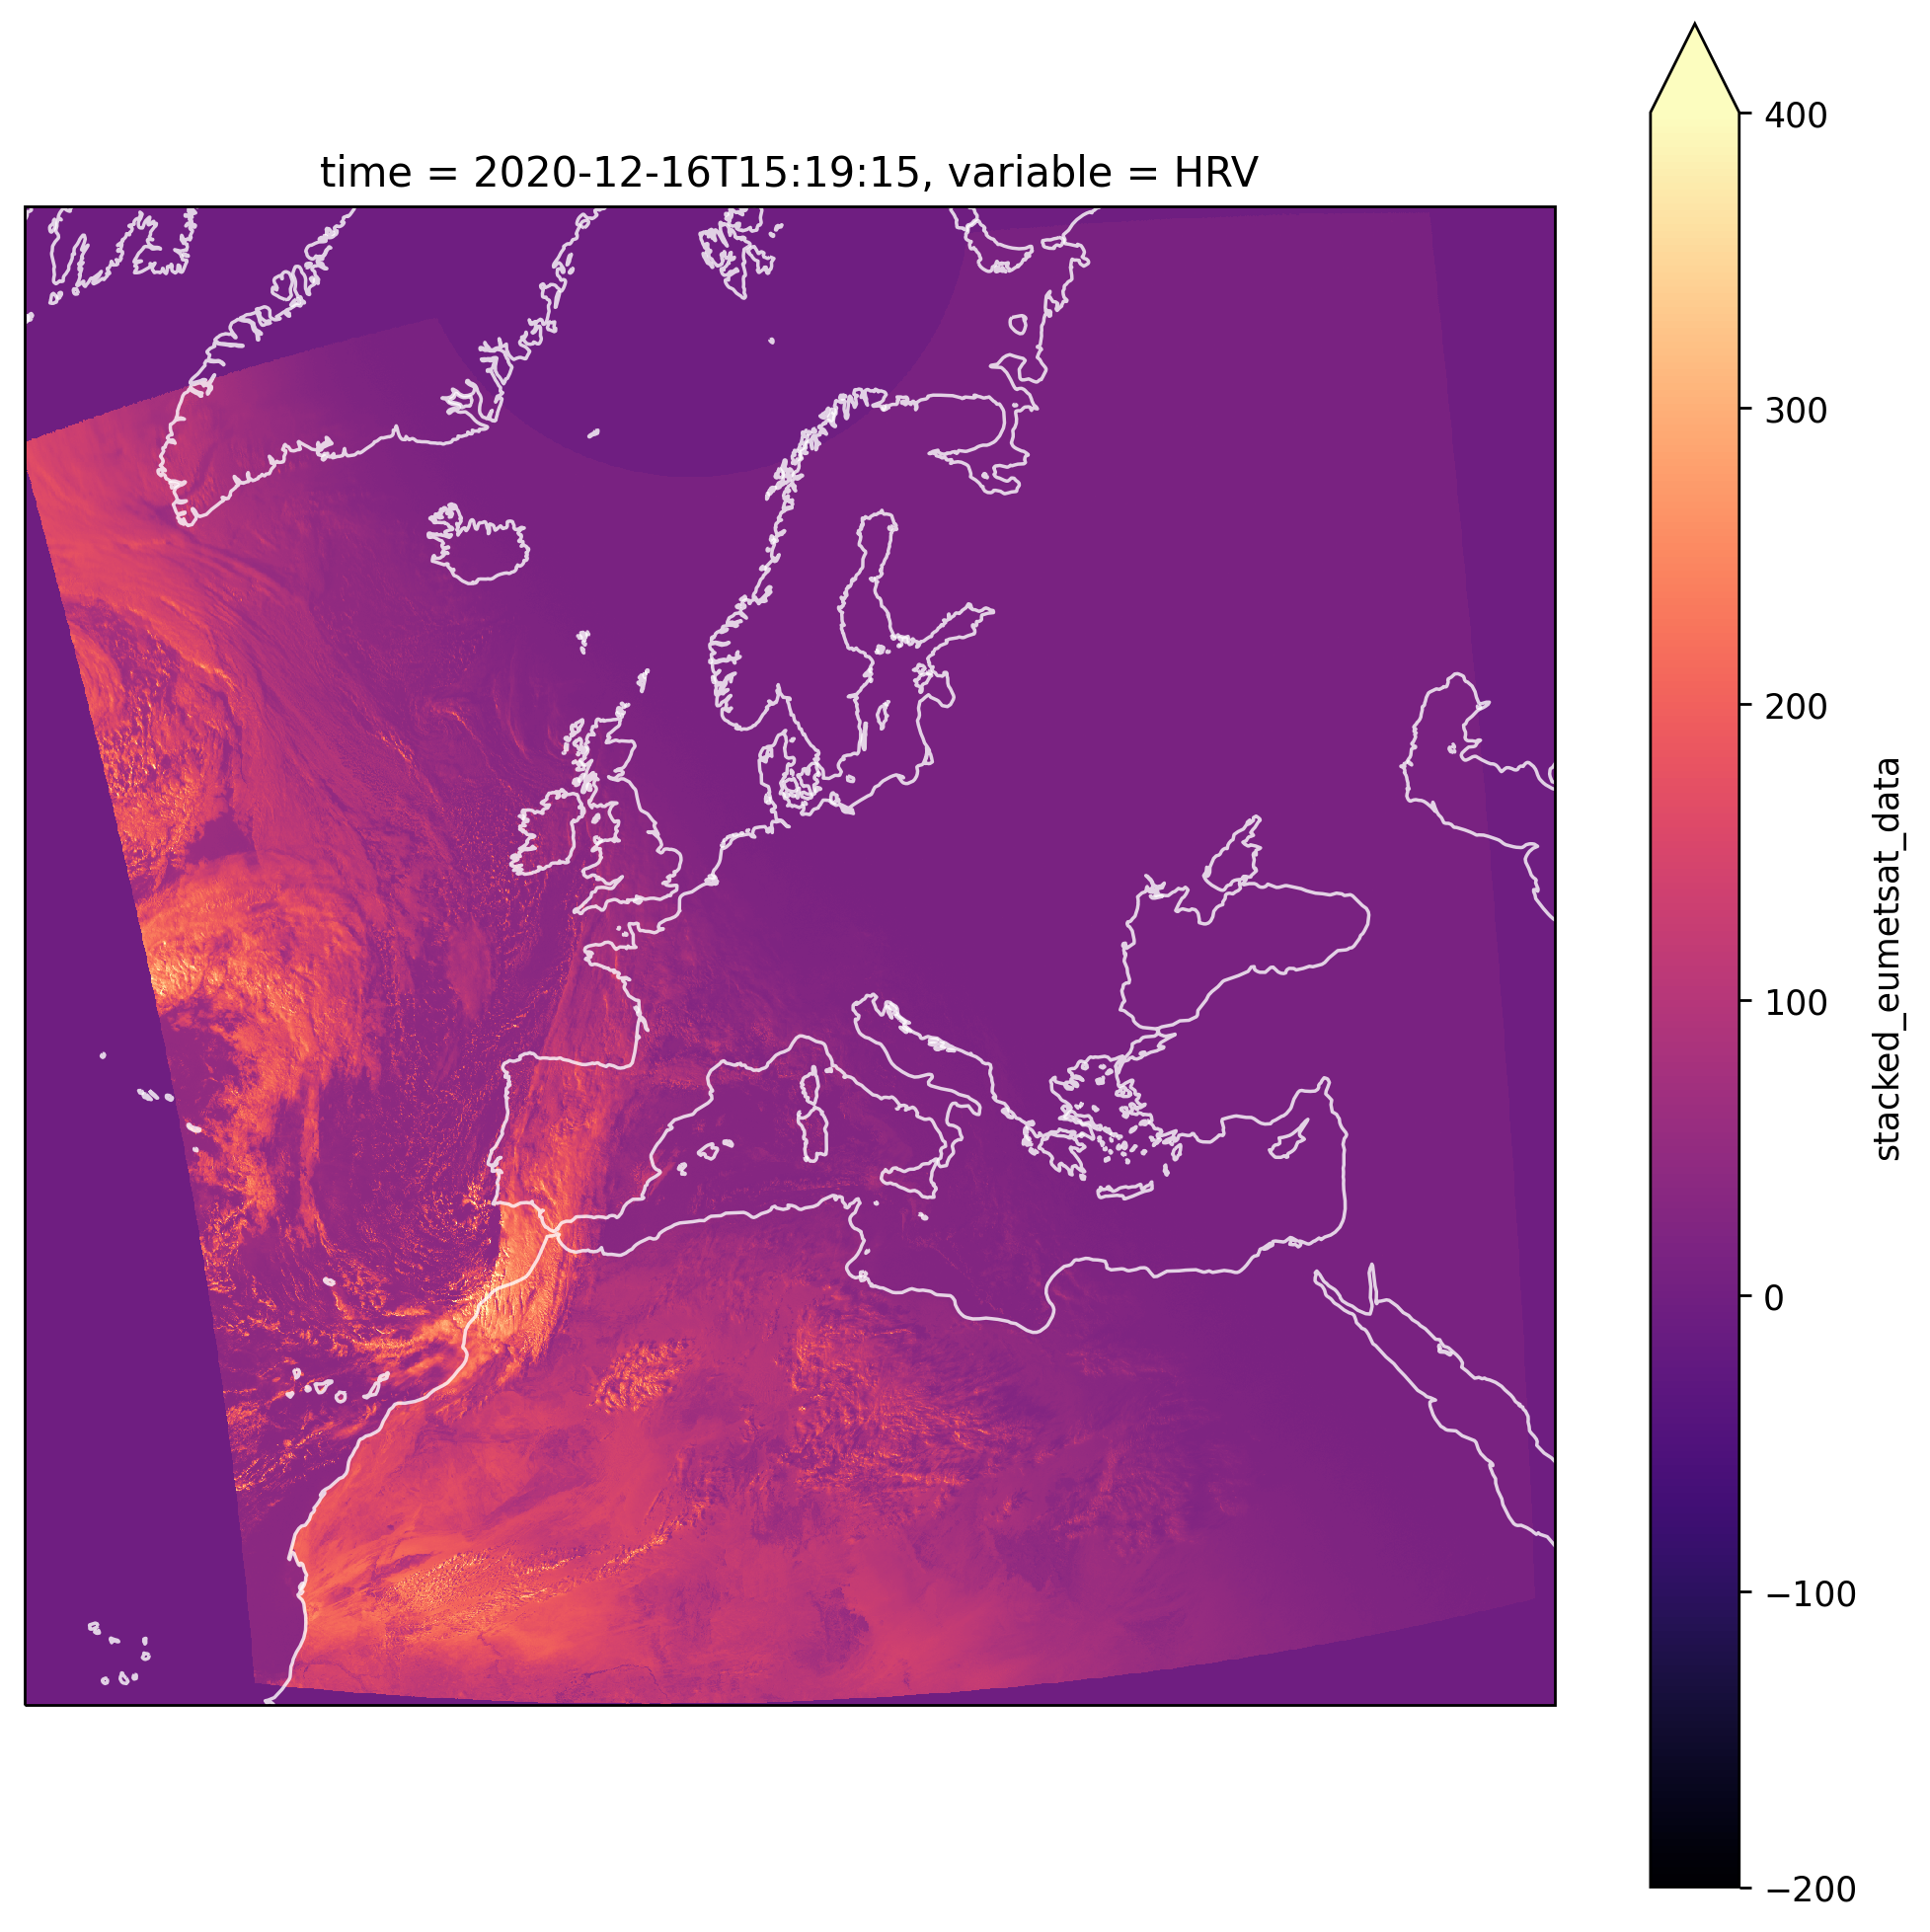

In [ ]:
fig = plt.figure(dpi=250, figsize=(10, 10))
ax = plt.axes(projection=ccrs.TransverseMercator())

da_HRV_sample.T.plot.imshow(ax=ax, cmap='magma', vmin=-200, vmax=400)

ax.coastlines(resolution='50m', alpha=0.8, color='white')